# CIMP6:
## Wegener–Bergeron–Findeisen process:
### The WBF process describes how ice crystals grow by attracting water vapor from supercooled water droplets, leading to the formation of snow or other forms of frozen precipitation.
<a href="https://aims2.llnl.gov/search" style="color: blue;">ESGF website</a>


MODIS data:

* Select a project -> obs4mips
* Identifiers -> Source ID -> MODIS-1-0

* time: 139 entries (a time axis, likely from 2000 to 2011).
* lat: 180 values (latitude, likely ranging from -89.5 to 89.5).
* lon: 360 values (longitude, likely from 0.5 to 359.5).
* bnds: 2 values, likely representing boundary information for time, latitude, and longitude
* clt: This is the main data variable, likely representing cloud fraction (the percentage of sky covered by clouds) over time, across latitudes and longitudes.
* The shape (139, 180, 360) represents the actual data variable—cloud fraction values—stored in a 3D array with dimensions corresponding to time, latitude
  
**Flattening the Grids:**
Flattening is done to convert these 2D arrays into 1D arrays so that they can be plotted on the scatter plot.

* lon_flat = lon_grid.flatten() will give you a 1D array with all 360 longitude values for each of the 180 latitudes (i.e., lon_flat will have 180 * 360 = 64,800 values).

* lat_flat = lat_grid.flatten() will give you a 1D array with 64,800 latitude values corresponding to each longitude. These latitudes are repeated for each longitude, matching the structure of lon_flat.

After flattening, you now have two 1D arrays:

* lon_flat: Longitude values (64,800 points).
* lat_flat: Latitude values (64,800 points).
* clt.shape[0] corresponds to the number of time steps (the size of the time dimension).
* clt.shape[1] corresponds to the number of latitude points (the size of the lat dimension).
* clt.shape[2] corresponds to the number of longitude points (the size of the lon dimension).

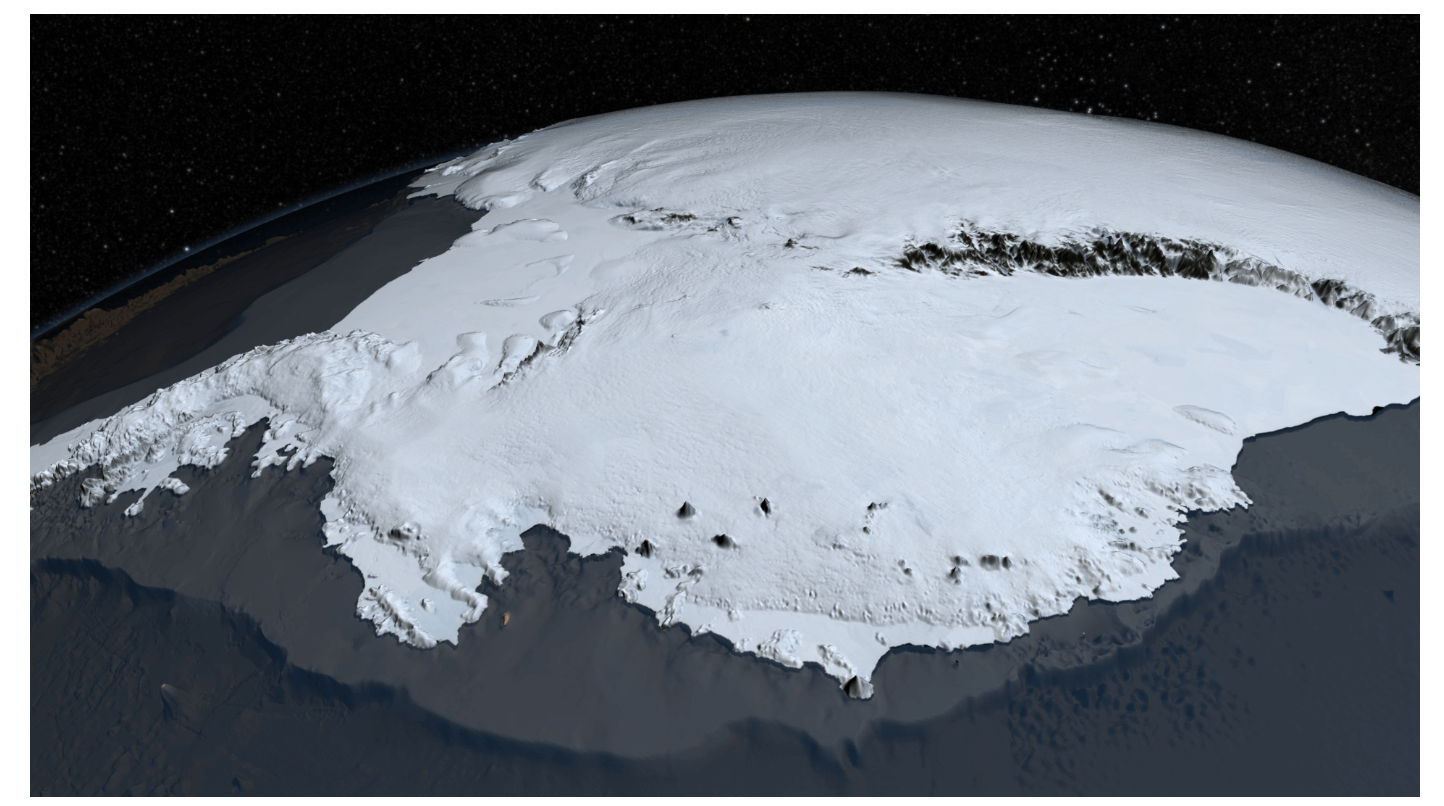

In [3]:
pip install xarray numpy cartopy matplotlib watermark seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import xarray as xr
import pandas as pd
from watermark import watermark

In [5]:
watermark(iversions=True, globals_=globals())

'pandas    : 2.2.3\nxarray    : 2025.1.1\ncartopy   : 0.24.0\nseaborn   : 0.13.2\nmatplotlib: 3.10.0\nnumpy     : 2.0.2\nwatermark : 2.5.0\n'

In [6]:
# Open the NetCDF file
ds = xr.open_dataset('clt_mon_MODIS-1-0_BE_gn_200003-201109.nc')

# Overview
print(ds)

# dimensions and variables
print(ds.dims)
print(ds.variables)

<xarray.Dataset> Size: 36MB
Dimensions:    (time: 139, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2000-03-16T12:00:00 ... 2011-09-16
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    clt        (time, lat, lon) float32 36MB ...
Attributes: (12/35)
    institution:            NASA's Jet Propulsion Laboratory, Pasadena, CA 91...
    institute_id:           NASA-GSFC
    experiment_id:          obs
    source:                 MODIS MOD08_M3 Cloud Fraction Mean Mean output pr...
    model_id:               Obs-MODIS
    contact:                Steven A. Ackerman (stevea@ssec.wisc.edu) Steven ...
    ...                     ...
    original_drsFilenam

In [7]:
# Access the lat, lon, and dat
lat = ds['lat']
lon = ds['lon']
clt = ds['clt']

# Check the shape of the data
print(lat.shape, lon.shape, clt.shape)

(180,) (360,) (139, 180, 360)


In [8]:
# lis of data in the file 
print(list(ds.variables.keys()))

['time', 'lat', 'lon', 'time_bnds', 'lat_bnds', 'lon_bnds', 'clt']


In [9]:
# Get the minimum and maximum of the clt variable across all dimensions
clt_min = ds['clt'].min().values
clt_max = ds['clt'].max().values

# Print the range
print(f"Cloud cover (CLT) range: {clt_min} to {clt_max}")

Cloud cover (CLT) range: 0.0 to 100.0


In [10]:
# Select a small portion of clt data for the first time step, first 5 latitudes, and first 5 longitudes
clt_subset = ds['clt'].isel(time=0, lat=slice(0, 5), lon=slice(0, 5))
# isel is slicer in xarray
# Display the selected data portion
print(clt_subset)
print(clt_subset.values)

<xarray.DataArray 'clt' (lat: 5, lon: 5)> Size: 100B
array([[21.83, 22.51, 23.42, 22.35, 22.52],
       [16.89, 16.91, 16.42, 16.05, 17.08],
       [12.57, 12.51, 13.16, 12.25, 12.32],
       [11.86, 11.54, 12.47, 11.76, 12.06],
       [10.39,  9.55, 10.57,  9.55, 10.32]], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2000-03-16T12:00:00
  * lat      (lat) float64 40B -89.5 -88.5 -87.5 -86.5 -85.5
  * lon      (lon) float64 40B 0.5 1.5 2.5 3.5 4.5
Attributes:
    standard_name:     cloud_area_fraction
    long_name:         Total Cloud Fraction
    comment:           for the whole atmospheric column, as seen from the sur...
    units:             %
    original_name:     clt
    cell_methods:      time: mean
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
[[21.83 22.51 23.42 22.35 22.52]
 [16.89 16.91 16.42 16.05 17.08]
 [12.57 12.51 13.16 12.25 12.32]
 [11.86 11.54 12.47 11.76 12.06]
 [10.39  9.55 10.

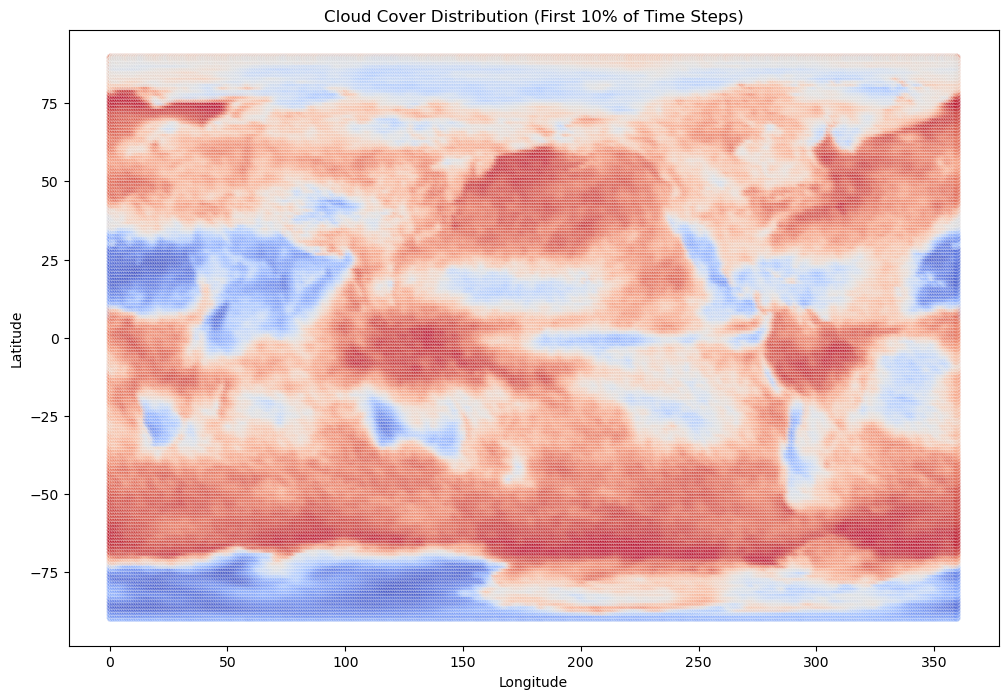

In [11]:
# Calculate the first 1% of time steps
time_steps_to_process = int(0.1 * clt.shape[0])

# Create a figure for the first 10% of time steps
plt.figure(figsize=(12, 8))

# Loop over the first 1% of time steps
for t in range(time_steps_to_process):  # Loop over each time step (first 10%)
    # Select data for this time step
    clt_data = clt.isel(time=t).values
    lat_data = lat.values  
    lon_data = lon.values  

    # Create 2D meshgrid for lat and lon 
    #A meshgrid is used to generate a 2D grid from two 1D arrays (latitude and longitude in this case)
    lon_grid, lat_grid = np.meshgrid(lon_data, lat_data)

    # Flatten the 2D arrays (for fixing difference in number of variable)
    lon_flat = lon_grid.flatten()
    lat_flat = lat_grid.flatten()
    clt_flat = clt_data.flatten()

    # Ensure that the lengths of the arrays are the same
    assert len(lon_flat) == len(lat_flat) == len(clt_flat)

    # Create a seaborn scatter plot for this time step now they are points
    sns.scatterplot(x=lon_flat, y=lat_flat, hue=clt_flat, palette="coolwarm", alpha=0.4, legend=False)

# Customize the plot with titles and labels
plt.title('Cloud Cover Distribution (First 10% of Time Steps)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### Look through Data

In [12]:

# Select a portion of data (e.g., the first 10 time steps, latitude range from 1 to 3, and longitude range from 2 to 4)
subset_ds = ds.isel(time=slice(0, 10), lat=slice(1, 3), lon=slice(2, 4))

# Show the selected portion of the entire dataset
print(subset_ds)

# If you want to print each variable (e.g., clt, lat, lon, time, etc.)
for var in subset_ds.data_vars:
    print(f"\n{var} variable data:")
    print(subset_ds[var].values)  # Prints the values of each variable in the subset


<xarray.Dataset> Size: 496B
Dimensions:    (time: 10, lat: 2, lon: 2, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 80B 2000-03-16T12:00:00 ... 2000-12-16T1...
  * lat        (lat) float64 16B -88.5 -87.5
  * lon        (lon) float64 16B 2.5 3.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 160B ...
    lat_bnds   (lat, bnds) float64 32B ...
    lon_bnds   (lon, bnds) float64 32B ...
    clt        (time, lat, lon) float32 160B 16.42 16.05 13.16 ... 30.7 28.46
Attributes: (12/35)
    institution:            NASA's Jet Propulsion Laboratory, Pasadena, CA 91...
    institute_id:           NASA-GSFC
    experiment_id:          obs
    source:                 MODIS MOD08_M3 Cloud Fraction Mean Mean output pr...
    model_id:               Obs-MODIS
    contact:                Steven A. Ackerman (stevea@ssec.wisc.edu) Steven ...
    ...                     ...
    original_drsFilename:   /work/gleckler1/processed_data/JPL_obs4MI

In [13]:
# Select a portion of data (e.g., the first 10 time steps, latitude range from 1 to 3, and longitude range from 2 to 4)
subset_ds = ds.isel(time=slice(0, 10), lat=slice(1, 3), lon=slice(2, 4))

# Convert the subset to a pandas DataFrame
# This will flatten the dataset and align variables side by side
df = subset_ds.to_dataframe()

# Display the DataFrame
print(df)


                                    time_bnds  lat_bnds  lon_bnds        clt
time                lat   lon bnds                                          
2000-03-16 12:00:00 -88.5 2.5 0    2000-03-01     -89.0       2.0  16.420000
                              1    2000-04-01     -88.0       3.0  16.420000
                          3.5 0    2000-03-01     -89.0       3.0  16.049999
                              1    2000-04-01     -88.0       4.0  16.049999
                    -87.5 2.5 0    2000-03-01     -88.0       2.0  13.160000
...                                       ...       ...       ...        ...
2000-12-16 12:00:00 -88.5 3.5 1    2001-01-01     -88.0       4.0  30.250000
                    -87.5 2.5 0    2000-12-01     -88.0       2.0  30.700001
                              1    2001-01-01     -87.0       3.0  30.700001
                          3.5 0    2000-12-01     -88.0       3.0  28.459999
                              1    2001-01-01     -87.0       4.0  28.459999

### **Plotting using Cartopy and pcoloremesh library**
* map creation  tools
* Have a different projection one we use in poles
* cordinate system (GCS : lon an lat , PCS: 2D xy, Datum : refrences for glob and north america,
  projectio system :   based on your data
* add data to map (like name badge)
  *https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/feature_interface.html*
* add feature(color, ocean, line , coast line): *https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/feature_interface.html*
  #### matplotlib.pyplot.pcolormesh:
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html
  * For color map in 2D
  

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1905: UserWarning: Handling wrapped coordinates with gouraud shading is likely to introduce artifacts. It is recommended to remove the wrap manually before calling pcolormesh.
  warnings.warn("Handling wrapped coordinates with gouraud "


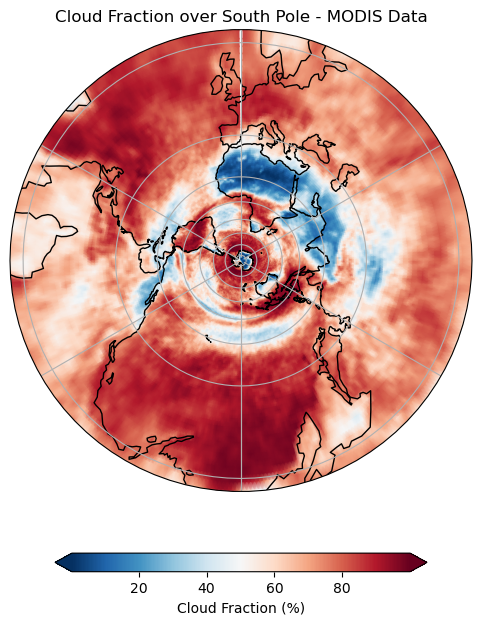

In [17]:
# Set up the plot with South Polar Stereographic projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.0))

# Plot the data using pcolormesh
mesh = ax.pcolormesh(lon_grid, lat_grid, clt_data, 
                    cmap='RdBu_r', 
                    shading='gouraud',
                    transform=ccrs.PlateCarree())  # Data is  in lat/lon coordinates # gourou d blured shadinf , auto is pixelate

# Add a horizontal colorbar below the plot

cbar = plt.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.1, shrink=0.4, extend='both')
cbar.set_label('Cloud Fraction (%)')  # Adjust label based on data

# Add coastlines for reference
ax.coastlines()

# Add gridlines
ax.gridlines()

# Show the plot
plt.title('Cloud Fraction over South Pole - MODIS Data')
plt.show()